In [1]:
%pylab inline
import tradingWithPython as twp
import tradingWithPython.lib.yahooFinance as yf
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
price = pd.Series(arange(10))
signal = pd.Series(index=price.index)
signal[2] = 100
signal[3] = 0  # exit
signal[6] = -100 # go short 100$
signal[8] = 0 # exit


In [3]:
pd.DataFrame({'price':price, 'signal':signal})

,price,signal
0,0,NaN
1,1,NaN
2,2,100.0
3,3,0.0
4,4,NaN
5,5,NaN
6,6,-100.0
7,7,NaN
8,8,0.0
9,9,NaN


In [1]:
bt = twp.backtest.Backtest(price, signal) #该方法应该是,用于单个证券，而且每日不rebalance

NameError: name 'twp' is not defined

In [5]:
bt.data

,price,shares,value,cash,pnl
0,0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0
2,2,50.0,100.0,-100.0,0.0
3,3,0.0,0.0,50.0,50.0
4,4,0.0,0.0,50.0,50.0
5,5,0.0,0.0,50.0,50.0
6,6,-17.0,-102.0,152.0,50.0
7,7,-17.0,-119.0,152.0,33.0
8,8,0.0,0.0,16.0,16.0
9,9,0.0,0.0,16.0,16.0


In [6]:
bt.data['delta'] = bt.data['shares'].diff().fillna(0)

In [7]:
bt.data

,price,shares,value,cash,pnl,delta
0,0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0
2,2,50.0,100.0,-100.0,0.0,50.0
3,3,0.0,0.0,50.0,50.0,-50.0
4,4,0.0,0.0,50.0,50.0,0.0
5,5,0.0,0.0,50.0,50.0,0.0
6,6,-17.0,-102.0,152.0,50.0,-17.0
7,7,-17.0,-119.0,152.0,33.0,0.0
8,8,0.0,0.0,16.0,16.0,17.0
9,9,0.0,0.0,16.0,16.0,0.0


In [8]:
bt.sharpe

2.1799902786275269

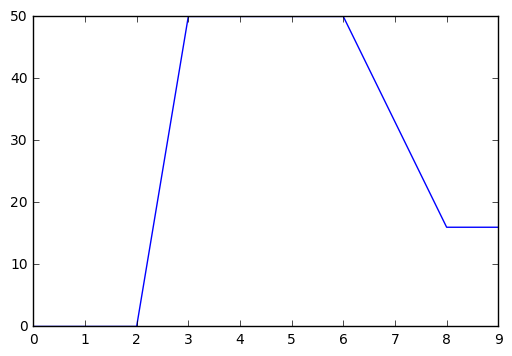

In [9]:
bt.pnl.plot()

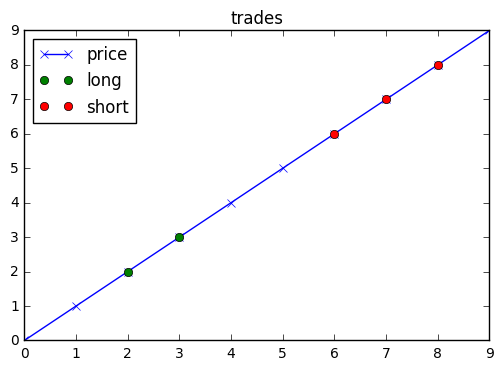

In [10]:
bt.plotTrades()

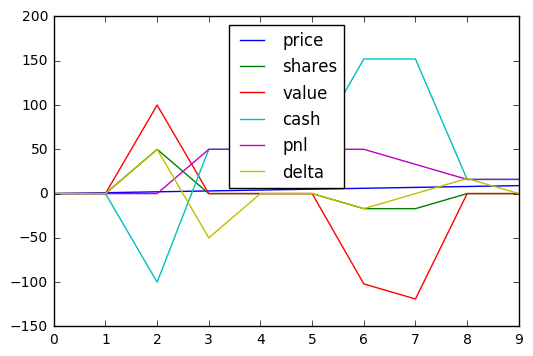

In [11]:
bt.data.plot()

In [12]:
hist_spy = yf.getHistoricData('spy')['adj_close'][-2500:]

Got 6026 days of data


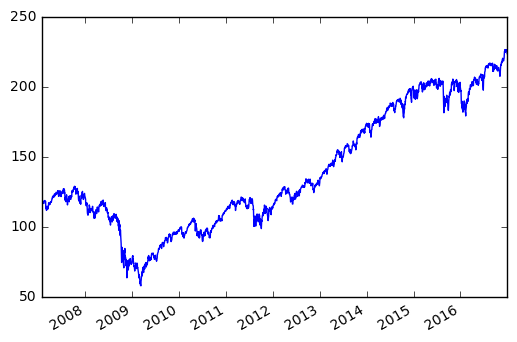

In [13]:
hist_spy.plot()

In [14]:
signal = pd.Series(index=hist_spy.index) #也是用的series
signal[pd.datetime(2008,1,3)] = -10000
signal[pd.datetime(2009,1,5)] = 10000
signal[pd.datetime(2013,1,8)] = 0

In [15]:
bt = twp.backtest.Backtest(hist_spy, signal, initialCash=0)

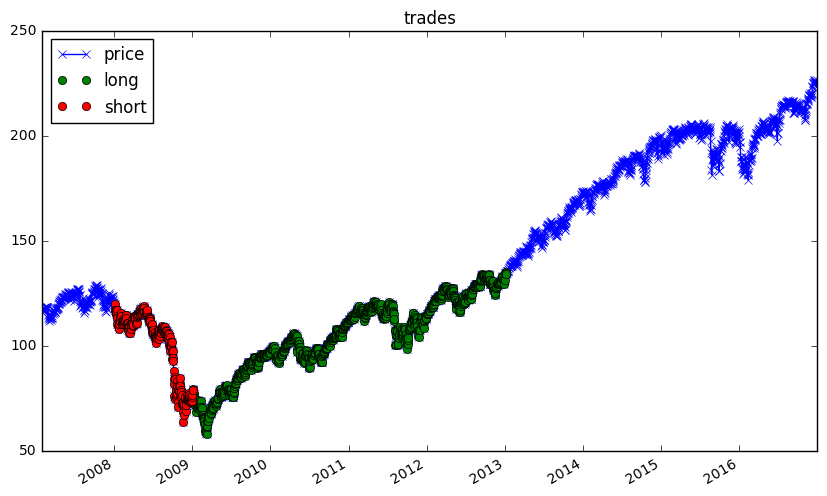

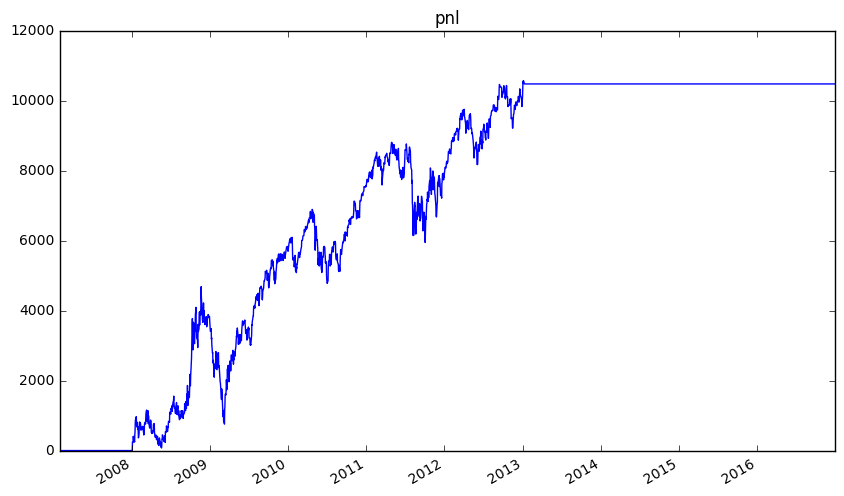

In [16]:
figsize(10,6)
bt.plotTrades()
figure()
bt.pnl.plot()
title('pnl')

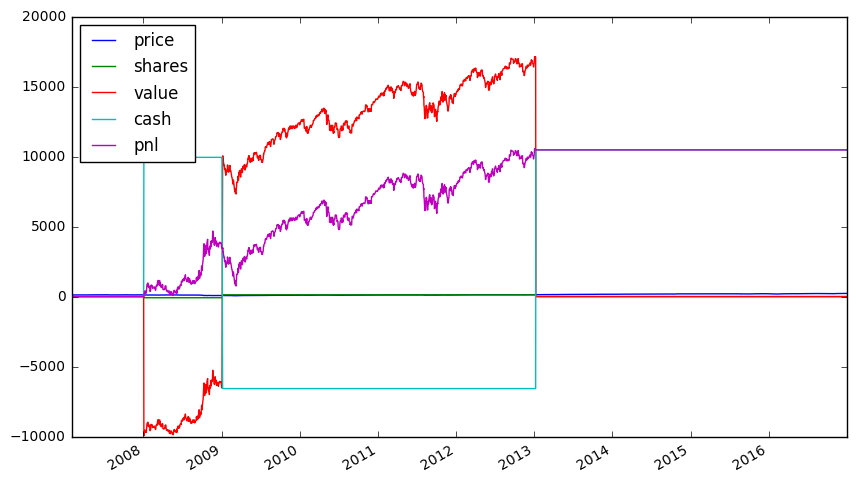

In [17]:
bt.data.plot()